# Introduction to SciKit-Learn (sklearn)

0. An end-to-end SciKit-Learn workflow

In [4]:
# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Step 1. Get the data ready

In [5]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [6]:
# create X (features matrix)
x = heart_disease.drop("target", axis=1)

# create Y (labels)
y = heart_disease["target"]

In [7]:
# split the data into training sets and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size = 0.2)

In [8]:
car_sales = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [9]:
# create X (features matrix)
x = car_sales.drop("Price", axis = 1)
# create Y (labels)
y = car_sales["Price"]


# splitting into training and test sets 
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)

In [10]:
# Deal with missing data
# find out missing fields 

car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

###  option 1 : Fill missing data with Pandas


In [11]:
#  Fill the Make column
car_sales["Make"].fillna("missing", inplace=True)

# Fill the Colour Column
car_sales["Colour"].fillna("missing", inplace=True)

# Fill the Odometer Column
car_sales["Odometer (KM)"].fillna(car_sales["Odometer (KM)"].mean(), inplace=True)

# Fill the Doors column
car_sales["Doors"].fillna(4, inplace=True)

In [12]:
car_sales.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [13]:
car_sales.dropna(inplace=True)

In [14]:
car_sales.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [15]:
#  reassign x & y

x = car_sales.drop("Price", axis = 1)
y = car_sales["Price"]


In [16]:
#  convert all categories into numerical
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder = "passthrough")

transformed_x = transformer.fit_transform(car_sales)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [17]:
# Build machine learning model

from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor()
# model.fit(x_train, y_train)
# model.score(x_test, y_test)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [18]:
# splitting into training and test sets 

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

np.random.seed(10)
x_train, x_test, y_train, y_test = train_test_split(transformed_x,
                                                   y,
                                                 test_size=0.2)


model.fit(x_train, y_train)


RandomForestRegressor()

In [19]:
model.score(x_test, y_test)

0.9997857220563487

### Option 2: Fill missing data with SciKit Learn

In [20]:
car_sales_1 = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_1.isna().sum()


Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [21]:
# remove rows with price as na
car_sales_1.dropna(subset=["Price"], inplace=True)
car_sales_1.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [22]:
# split into X & y

X = car_sales_1.drop(["Price"], axis = 1)
y = car_sales_1["Price"]

In [23]:
# fill missing values with scikit learn

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


# fill categorical values with missing and numerial values with mean

cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# create an imputer (something that fills the blank place)
imputer = ColumnTransformer([("cat_imputer", cat_imputer, cat_features),
                            ("door_imputer", door_imputer, door_features),
                            ("num_imputer", num_imputer, num_features)
                            ])

# transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [24]:
car_sales_filled = pd.DataFrame(filled_X,
                                columns= ['Make',"Colour","Doors","Odometer (KM)"]
                               )

car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577
...,...,...,...,...
945,Toyota,Black,4,35820
946,missing,White,3,155144
947,Nissan,Blue,4,66604
948,Honda,White,4,215883


In [25]:
car_sales_filled.isna().sum()
# all empty cells are filled


Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [26]:
# convert data into number

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                               remainder="passthrough")

transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [27]:
# lets fit a model

np.random.seed(10)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test =  train_test_split(transformed_x,
                                                    y,
                                                    test_size = 0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train)


RandomForestRegressor()

In [28]:
model.score(X_test,y_test)

0.30730918533574325

## Step 2 - Choosing the right estimator /algorithm for  the problem

 Scikit learn uses  estimator as another term for m/c learning model/algorithm
 
 
      * Classification - predicting the sample is one thing or another
      * Regression - predictng a number
      
      Refer SciKit Learning map:
      https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
      
      

### Picking a machine learning model for regression problem



In [29]:
# import Boston housind dataset

from sklearn.datasets import load_boston
boston = load_boston()
boston;
# here boston is a dictionary

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [30]:
# convert the dictionary to DataFrame

boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [31]:
# Ridge regression model
from sklearn.linear_model import Ridge

# set up random seed
np.random.seed(10)

# create x & y
x = boston_df.drop(["target"], axis = 1)
y = boston_df["target"]

# split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size = 0.2)

# Instantiate Ridge model
model = Ridge()
model.fit(x_train, y_train)

# check the score of ridge model
model.score(x_test, y_test)


0.6655627286231776

In [32]:
# Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor

# set the seed
np.random.seed(42)

# create x & y
x = boston_df.drop(["target"], axis = 1)
y = boston_df["target"]

# split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# instantiate random forest model
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

# score of rf model
rf_model.score(x_test, y_test)

0.8654448653350507

In [33]:
# compare ridge model and rf model score
model.score(x_test, y_test)

0.7007744830048392

### Picking a machine learning model for classification problem

In [34]:
#  using heart disease data set
# import linear svc estimator class

from sklearn.svm import LinearSVC

# set random seed
np.random.seed(42)

# create x & y
x = heart_disease.drop(["target"], axis = 1)
y = heart_disease["target"]

# split into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# instantiate linear svc model
lsvc_model = LinearSVC(dual=False)
lsvc_model.fit(x_train, y_train)

# check the score
lsvc_model.score(x_test, y_test)


0.8688524590163934

In [35]:
# Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier 

# set random seed
np.random.seed(42)

# x & y
x = heart_disease.drop(["target"], axis = 1)
y = heart_disease["target"]

# split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# instantiate randomforestclassifer model
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# check the score
clf.score(x_test, y_test)

0.8524590163934426

## tidbit:
    * if you have structured data, use Ensemble methods
    * if you have unstructed data, use deep learning / transfer learning

 ## Step 3 - Fit the model/ algorithm on our data and use it to make predictions
       
 ### 3.1 Fitting the model to the data
       
        x = features/ feature variables/ data
        y = labels/ targets/ target variables
        

In [36]:
from sklearn.ensemble import RandomForestClassifier 

# set random seed
np.random.seed(42)

# x & y
x = heart_disease.drop(["target"], axis = 1)
y = heart_disease["target"]

# split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# instantiate randomforestclassifer model
clf = RandomForestClassifier()

# fit the model to data (training  the machine learning model)
clf.fit(x_train, y_train)

# check the score (evaluate the model :: use the patterns the model has learned)
clf.score(x_test, y_test)



0.8524590163934426

### 3.2 Make predictions using the machine learning model

2 ways to make predictions:

     1. 'Predict()'
     2. 'Predict_proba()'
     

In [37]:
# use a trained model to predict using predict()
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [38]:
np.array([y_test])

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [39]:
# comparing predictions to truth labels to evaluate the model

# method 1
y_pred = clf.predict(x_test)
np.mean(y_pred == y_test)

0.8524590163934426

In [40]:
# method 2
clf.score(x_test, y_test)

0.8524590163934426

In [41]:
# method 3 :: using accuracy score 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8524590163934426

In [42]:
# use a trained model to predict using predict_proba() : returns the probabilities of classification label
clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [43]:
# Prediction on regressor model

from sklearn.ensemble import RandomForestRegressor

# set the seed
np.random.seed(42)

# x & y
x = boston_df.drop(["target"], axis = 1)
y = boston_df["target"]

# split into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# instantiate the model and fit the model
rf_model = RandomForestRegressor().fit(x_train, y_train)

# make predictions
y_preds = rf_model.predict(x_test)

In [44]:
y_preds[:5]

array([23.081, 30.574, 16.759, 23.46 , 16.893])

In [45]:
np.array([y_test[:5]])

array([[23.6, 32.4, 13.6, 22.8, 16.1]])

In [46]:
# compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.136382352941176

## Step 4 - Evaluating the model

3 ways to evaluate:
1. Estimator score method
2. The scoring parameter
3. Problem- specifiv metric functions

### Score method

In [47]:
# evaluation on classifier model
from sklearn.ensemble import RandomForestClassifier 

# set random seed
np.random.seed(42)

# x & y
x = heart_disease.drop(["target"], axis = 1)
y = heart_disease["target"]

# split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# instantiate randomforestclassifer model
clf = RandomForestClassifier()

# fit the model to data (training  the machine learning model)
clf.fit(x_train, y_train)

# check the score (evaluate the model :: use the patterns the model has learned)
clf.score(x_test, y_test)

0.8524590163934426

In [48]:
clf.score(x_train, y_train) #mean accuracy for classifier models

1.0

In [49]:
# evaluation on regressor model
from sklearn.ensemble import RandomForestRegressor

# set the seed
np.random.seed(42)

# x & y
x = boston_df.drop(["target"], axis = 1)
y = boston_df["target"]

# split into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# instantiate the model and fit the model
rf_model = RandomForestRegressor().fit(x_train, y_train)


In [50]:
rf_model.score(x_test, y_test) #coefficient of determination for regressor models

0.8654448653350507

### Scoring parameter

In [51]:
from sklearn.model_selection import cross_val_score

# evaluation on classifier model
from sklearn.ensemble import RandomForestClassifier 

# set random seed
np.random.seed(42)

# x & y
x = heart_disease.drop(["target"], axis = 1)
y = heart_disease["target"]

# split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# instantiate randomforestclassifer model
clf = RandomForestClassifier()

# fit the model to data (training  the machine learning model)
clf.fit(x_train, y_train)

RandomForestClassifier()

In [52]:
cross_val_score(clf, x, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [53]:
 np.mean(cross_val_score(clf,x,y))

0.8183606557377049

In [54]:
clf.score(x_test, y_test)

0.8524590163934426

In [55]:
# scoring parameter is set to None by default
# Default scoring parameter of classifier  = mean accuracy

### Classification model evaluation metrics
     1. Accuracy
     2. Area under ROC curve
     3. Confusion matrix
     4. Classification report
     

#### Accuracy

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier 

# set random seed
np.random.seed(42)

# x & y
x = heart_disease.drop(["target"], axis = 1)
y = heart_disease["target"]

# split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# instantiate randomforestclassifer model
clf = RandomForestClassifier()

# fit the model to data (training  the machine learning model)
# clf.fit(x_train, y_train)

cross_val_score = cross_val_score(clf, x, y)


In [57]:
np.mean(cross_val_score)

0.8215300546448088

In [58]:
print(f'Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score)*100:.2f}%')

Heart Disease Classifier Cross-Validated Accuracy: 82.15%


#### Area under Receiver Operating characteristics Curve (AUC/ROC)

it is the comparison of model's true positive rate -tpr vs model's false positive rate -fpr

In [59]:
from sklearn.metrics import roc_curve
# till fit the steps are the same as above
clf.fit(x_train, y_train)

y_probs = clf.predict_proba(x_test)
y_probs[:10]

array([[0.94, 0.06],
       [0.42, 0.58],
       [0.51, 0.49],
       [0.89, 0.11],
       [0.23, 0.77],
       [0.16, 0.84],
       [0.25, 0.75],
       [0.96, 0.04],
       [0.98, 0.02],
       [0.51, 0.49]])

In [60]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.06, 0.58, 0.49, 0.11, 0.77, 0.84, 0.75, 0.04, 0.02, 0.49])

In [61]:
# calculate fpr, tpr, threshold

fpr, tpr, threshold = roc_curve(y_test, y_probs_positive)


In [62]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03448276, 0.03448276,
       0.06896552, 0.06896552, 0.10344828, 0.10344828, 0.17241379,
       0.17241379, 0.17241379, 0.24137931, 0.24137931, 0.27586207,
       0.55172414, 0.68965517, 0.72413793, 0.72413793, 0.79310345,
       0.89655172, 0.96551724, 1.        ])

In [63]:
tpr

array([0.     , 0.03125, 0.09375, 0.1875 , 0.3125 , 0.40625, 0.59375,
       0.625  , 0.625  , 0.65625, 0.6875 , 0.71875, 0.71875, 0.75   ,
       0.75   , 0.84375, 0.90625, 0.90625, 0.9375 , 0.96875, 0.96875,
       0.96875, 0.96875, 1.     , 1.     , 1.     , 1.     , 1.     ])

In [64]:
threshold

array([2.  , 1.  , 0.99, 0.93, 0.85, 0.79, 0.75, 0.71, 0.7 , 0.68, 0.67,
       0.66, 0.64, 0.61, 0.57, 0.53, 0.49, 0.33, 0.26, 0.24, 0.12, 0.11,
       0.1 , 0.08, 0.06, 0.02, 0.01, 0.  ])

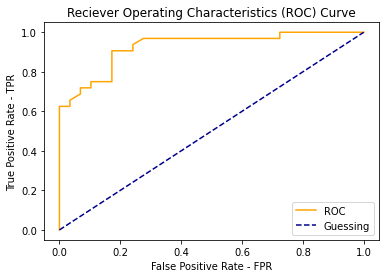

In [65]:
#  create function for plotting ROC curve

import matplotlib.pyplot as plt

# define a function to plot ROC curve

def plot_roc_curve(fpr, tpr):
# plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC');

# plot baseline
    plt.plot([0,1], [0,1], color='darkblue', linestyle='--', label='Guessing');


# customize the plot
    plt.xlabel('False Positive Rate - FPR');
    plt.ylabel('True Positive Rate - TPR');
    plt.title('Reciever Operating Characteristics (ROC) Curve');
    plt.legend(loc = 'lower right');
    
# call the function
plot_roc_curve(fpr, tpr);

In [66]:
# find the auc score

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.9267241379310345

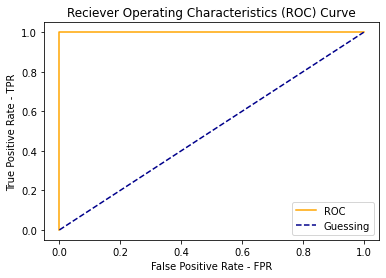

In [67]:
# plot a perfect roc curce

fpr, tpr, threshold = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [68]:
# find the perfect auc score

roc_auc_score(y_test, y_test)

1.0

### Confusion Matrix

In [69]:
# import confusion matrix
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test, y_preds)


array([[24,  5],
       [ 5, 27]], dtype=int64)

In [70]:
# visualize confusion matrix using pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=['Actual Labels'],
           colnames=['Predicted Labels']
           )


Predicted Labels,0,1
Actual Labels,,
0,24,5
1,5,27


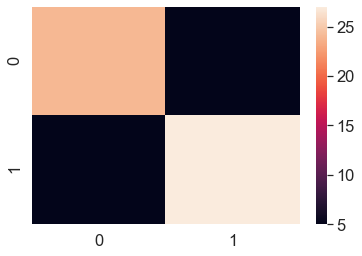

In [71]:
# import confusion matrix
from sklearn.metrics import confusion_matrix

# visualise confusion matrix using seaborn's heatmap() - plot rectangular data as a color-encoded matrix
import seaborn as sns

y_preds = clf.predict(x_test)

# set the font scale
sns.set(font_scale=1.5)

# create confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# plot it using seaborn
sns.heatmap(conf_mat);


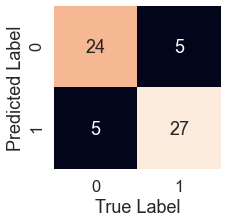

In [72]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matric using seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                    annot = True, #annotate the boxes with conf_mat info
                    cbar=False
                    )
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    

plot_conf_mat(conf_mat)

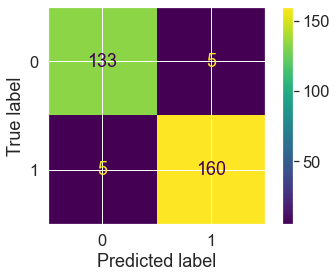

In [73]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf,x,y);

### Classification Report

In [74]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



### Regression Model Evaluation Metrics

    1. R^2 - r-Sqaured  or coeffiecient of determination.
    2. Mean Absolute Error MAE
    3. Mean Squared Error MSE
    
 R^2 - compares your model prediction to mean of the targets. Values can range from negative infinity(a very poor model) to 1. 
 for eg:- if all ur model does is predict the mean of the targets, its r^2 value would be 0. And if your model perfectly predicts a range of numbers its r^2 value would be 1.
    

In [75]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = boston_df.drop(['target'], axis = 1)
y = boston_df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

model = RandomForestRegressor()

model.fit(x_train, y_train)
model.score(x_test, y_test)


0.8654448653350507

In [76]:
from sklearn.metrics import r2_score

# fill an array with y_test mean 
y_test_mean = np.full(len(y_test), y_test.mean())


In [77]:
r2_score(y_test, y_test_mean)

2.220446049250313e-16

In [78]:
r2_score(y_test, y_test)

1.0

### Mean Absolute Error - MAE

it is the average of the absolute differences between the predictions and the actual values. It gives you an idea of how wrong your model predictions are.

In [79]:
from sklearn.metrics import mean_absolute_error

# create prediction
y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mae

2.136382352941176

In [80]:
# create a df for understanding
df = pd.DataFrame({"Actual Values" : y_test,
                  "Predicted Values" : y_pred})
df["Difference"] = df["Actual Values"] - df["Predicted Values"]
df

,Actual Values,Predicted Values,Difference
173,23.6,23.081,0.519
274,32.4,30.574,1.826
491,13.6,16.759,-3.159
72,22.8,23.460,-0.660
452,16.1,16.893,-0.793
...,...,...,...
412,17.9,13.159,4.741
436,9.6,12.476,-2.876
411,17.2,13.612,3.588
86,22.5,20.205,2.295


### Mean Squared Error - MSE

In [81]:
from sklearn.metrics import mean_squared_error

# make prediction
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mse

9.867437068627442

In [82]:
# check by calculating

squared = np.square(df['Difference'])
squared.mean()

9.867437068627439

### tidbit : for regression metric evaluation - minimise MSE, minimise MAE while maximize R^2

## Finally using `Scoring` Parameter

### Classification model

In [83]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop(['target'], axis = 1)
y = heart_disease['target']

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

clf = RandomForestClassifier()


In [84]:
np.random.seed(42)
cv_acc = cross_val_score(clf, x, y, cv=5, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [85]:
print(f'The Cross-Validates Accuracy is : {np.mean(cv_acc)*100:.2f} %') 

The Cross-Validates Accuracy is : 82.48 %


In [86]:
np.random.seed(42)
cv_acc = cross_val_score(clf, x, y, cv=5, scoring='accuracy')

In [87]:
print(f'The Cross-Validated Score is : {np.mean(cv_acc)*100:.2f}%')

The Cross-Validated Score is : 82.48%


In [88]:
np.random.seed(42)
cv_preci = cross_val_score(clf, x, y, cv=5, scoring='precision')
np.mean(cv_preci) 

0.8329547346025924

In [89]:
np.random.seed(42)
cv_recall = cross_val_score(clf, x, y, cv=5, scoring='recall')
np.mean(cv_preci)

0.8329547346025924

In [90]:
np.random.seed(42)
cv_f1 = cross_val_score(clf, x, y, cv=5, scoring='f1')
np.mean(cv_f1)

0.8426854603423346

### Regression model

In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = boston_df.drop(['target'], axis = 1)
y = boston_df['target']

model = RandomForestRegressor()


In [92]:
np.random.seed(42)
cv_r2 = cross_val_score(model, x,  y, cv=5, scoring = None)
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [93]:
np.random.seed(42)
cv_r2 = cross_val_score(model, x,  y, cv=5, scoring = 'r2')
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [94]:
np.random.seed(42)
cv_mae = cross_val_score(model, x,  y, cv=5, scoring = 'neg_mean_absolute_error')
cv_mae

array([-2.11419608, -2.58716832, -3.33976238, -3.78563366, -3.32941584])

In [95]:
np.random.seed(42)
cv_mse = cross_val_score(model, x,  y, cv=5, scoring = 'neg_mean_squared_error')
cv_mse

array([ -7.86326927, -12.71243178, -20.29089194, -45.93287403,
       -19.50774726])

## Using different Evaluation Metrics as SciKit-Learn Functions

### Classification evaluation functions

In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = heart_disease.drop(['target'], axis = 1)
y = heart_disease['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# make predictions
y_pred = clf.predict(x_test)

# Evaluate the Classifier
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1: {f1_score(y_test, y_pred)}")

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


### Regression Evaluation Functions

In [97]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = boston_df.drop(['target'], axis = 1)
y = boston_df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)

# make predictions
y_preds = model.predict(x_test)

# Evaluate the Regressor
print("Regressor metrics on the test data")
print(f"R^2 : {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")


Regressor metrics on the test data
R^2 : 0.8654448653350507
MAE: 2.136382352941176
MSE: 9.867437068627442


## Step 5 - Improving the Model

### 5.1 Hyperparameter tuning By hand

In [98]:
# define a function 
def evaluate_pred(y_true, y_pred):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels on classification
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    metric_dict = {"accuracy" : round(accuracy, 2),
                  "precision" : round(precision, 2),
                  "recall" : round(recall, 2),
                  "f1" : round(f1, 2)
                  }
    
    print(f"Accuracy: {accuracy*100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1: {f1:.2f}")
    
    return metric_dict

In [99]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# split x&y
x = heart_disease_shuffled.drop(['target'], axis = 1)
y = heart_disease_shuffled['target']

# split data into train, validate and test set by hand
train_split = round(0.7 * len(heart_disease_shuffled)) #70% data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) #15% data
x_train, y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split:valid_split], y[train_split:valid_split]
x_test, y_test = x[valid_split:], y[valid_split:]


clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# make baseline predictions
y_pred = clf.predict(x_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_pred(y_valid, y_pred)
baseline_metrics

Accuracy: 82.22%
Precision: 0.81
Recall: 0.88
F1: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [100]:
np.random.seed(42)

# create a second classifier with a different hyperparameter
clf2 = RandomForestClassifier(max_depth=1500)
clf2.fit(x_train, y_train)

# make predictions with different hyperparameter
y_pred2 = clf2.predict(x_valid)

# Evaluate the 2nd classifier 
clf2_metrics = evaluate_pred(y_valid, y_pred2)
clf2_metrics

Accuracy: 82.22%
Precision: 0.84
Recall: 0.84
F1: 0.84


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

### 5.2 Hyperparameter tuning By RandomizedSearchCV

In [104]:
from sklearn.model_selection import RandomizedSearchCV

# create a dictionary of hyperparameters we try to adjust
grid = {"n_estimators" : [10, 100, 200, 500, 1000, 1200],
       "max_depth" : [None, 5, 10, 20, 30],
       "max_features" : ["auto", "sqrt"],
       "min_samples_split" : [2, 4, 6],
       "min_samples_leaf" : [1, 2, 4]
       }

np.random.seed(42)

# x & y
x = heart_disease_shuffled.drop(["target"], axis = 1)
y = heart_disease_shuffled["target"]

# split into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# instantiate model
clf = RandomForestClassifier(n_jobs=1)

# setup RandomizedSearchCV

rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=10, #number of models to try
                           cv=5,
                           verbose=2)

# fit the model
rs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.1s
[CV] n_estimators=1000, min_samples_split=4, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   19.1s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [105]:
# call the best parameters
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [108]:
# make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(x_test)

# Evaluate the predictions
rs_metrics = evaluate_pred(y_test, rs_y_preds) #call the funtion defined in line 98

Accuracy: 81.97%
Precision: 0.77
Recall: 0.86
F1: 0.81


### 5.3 Hyperparameter tuning By GridSearchCV

In [109]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [112]:
from sklearn.model_selection import GridSearchCV

grid_2 = {'n_estimators': [100, 200, 500],
             'max_depth': [None],
             'max_features': ['auto', 'sqrt'],
             'min_samples_split': [6],
             'min_samples_leaf': [1, 2]
         }

np.random.seed(42)

# x & y
x = heart_disease_shuffled.drop(["target"], axis = 1)
y = heart_disease_shuffled["target"]

# split into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# instantiate model
clf = RandomForestClassifier(n_jobs=1)

# setup GridSearchCV

gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5,
                      verbose=2)

# fit the model
gs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   17.7s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [113]:
# call the best parameters
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [114]:
# make predictions with the best hyperparameters
gs_y_preds = gs_clf.predict(x_test)

# Evaluate the predictions
gs_metrics = evaluate_pred(y_test, gs_y_preds) #call the funtion defined in line 98

Accuracy: 78.69%
Precision: 0.74
Recall: 0.82
F1: 0.78


### compare the different model metrics

In [115]:
compare_metrics = pd.DataFrame({"baseline" : baseline_metrics,
                                 "clf_2" : clf2_metrics,
                                 "random search" : rs_metrics,
                                 "grid search" : gs_metrics
                               })

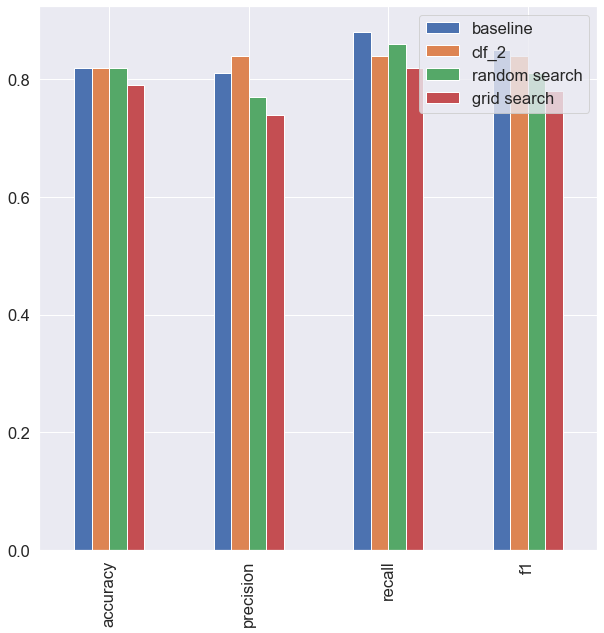

In [128]:
# plot the compare metrics

compare_metrics.plot.bar(figsize = (10,10));

## Step 6 - Save and load a trained model

There are 2 ways:
1. python's `pickle` module
2. `joblib` module

**pickle module**

In [130]:
import pickle

# save an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb")) #wb=write binary

In [131]:
# load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb")) #rb = read binary

In [133]:
# make predictions with the loaded model
pickle_y_preds = loaded_pickle_model.predict(x_test)

# evaluate
evaluate_pred(y_test, pickle_y_preds)

Accuracy: 78.69%
Precision: 0.74
Recall: 0.82
F1: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

**joblib**

In [136]:
from joblib import dump, load

# save model to file
dump(rs_clf, filename="rs_random_forest_model_1.joblib")

['rs_random_forest_model_1.joblib']

In [137]:
# load saved model

loaded_joblib_model = load(filename='rs_random-forest_model_1.joblib')

In [139]:
# make predictions with the loaded model
joblib_y_preds = loaded_joblib_model.predict(x_test)

# evaluate
evaluate_pred(y_test, joblib_y_preds)

Accuracy: 81.97%
Precision: 0.77
Recall: 0.86
F1: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

## Putting it all together

In [143]:
# import data file
data = pd.read_csv('car-sales-extended-missing-data.csv')

# check datatypes
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [144]:
# check for missing data
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

**Steps we want to do:**

    1. Fill the missing data
    2. Convert data to numbers
    3. Build a model on the data

In [163]:
# Getting Data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# set the random seed
np.random.seed(42)

# import data and drop the missing labels

data = pd.read_csv('car-sales-extended-missing-data.csv')
data.dropna(subset=["Price"], inplace=True)

# define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
                                         ("onehot", OneHotEncoder(handle_unknown="ignore"))])
door_feature = ["Doors"]
door_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="constant", fill_value=4))])

numeric_feature = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="mean"))])

# setup preprocessing steps (filling missing values and convert to numbers)
preprocessor = ColumnTransformer(transformers=[("cat", categorical_transformer, categorical_features),
                                              ("door", door_transformer, door_feature),
                                              ("num", numeric_transformer, numeric_feature)
                                              ])

# creating a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                       ("model", RandomForestRegressor())])

# split data
x = data.drop(["Price"], axis = 1)
y = data["Price"]

# split into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


# fit and score the model
model.fit(x_train, y_train)
model.score(x_test, y_test)


0.22188417408787875

In [170]:
# use GridSearchCV for regression pipeline

pipe_grid = {"preprocessor__num__imputer__strategy": ["mean", "median"],
            "model__n_estimators": [100,1000],
            "model__max_depth": [None,5],
            "model__max_features": ["auto"],
            "model__min_samples_split": [2,4]
            }

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)

# fit the model
gs_model.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   1.7s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_featur

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.3s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.3s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.3s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, mod

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.1min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [171]:
gs_model.score(x_test,y_test)

0.3339554263158365